# Importing Libraries

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Dataset Profiling
from ydata_profiling import ProfileReport

#Sklearn libraries and modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import label encoder 
from sklearn import preprocessing 

#Object Initialization
sc = StandardScaler()
label_encoder = preprocessing.LabelEncoder() 

C:\Users\st7725\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\st7725\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Reading Datasets

In [2]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

# EDA

In [3]:
train_dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# PassengerId

In [19]:
train_df = train_dataset[['PassengerId','Transported']]

#Handling PassengerID
x = train_df["PassengerId"].str.split("_", expand=True)
train_df = pd.concat([train_df.reset_index(drop=True),x.reset_index(drop=True)], axis=1)
train_df.rename(columns = {0:'Group_Id',1:'PID'}, inplace = True) 
train_df = train_df.astype({'PID': int})
train_df['family'] = train_df.groupby('Group_Id')['PID'].transform(lambda x: 1 if x.nunique() > 1 else 0)
train_df['family_count'] = train_df.groupby('Group_Id')['PID'].transform(lambda x: x.nunique())
# test_df = test_df.drop(['Group_Id','PID'],axis=1)
train_df['family'] = train_df['family'].replace({1: True, 0: False})

C:\Users\st7725\AppData\Local\Temp\ipykernel_12076\1497273028.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['family'] = train_df['family'].replace({1: True, 0: False})


In [20]:
train_df.head(5)

,PassengerId,Transported,Group_Id,PID,family,family_count
0,0001_01,False,0001,1,False,1
1,0002_01,True,0002,1,False,1
2,0003_01,False,0003,1,True,2
3,0003_02,False,0003,2,True,2
4,0004_01,True,0004,1,False,1


Transported
False    4315
True     4378
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Transported'>

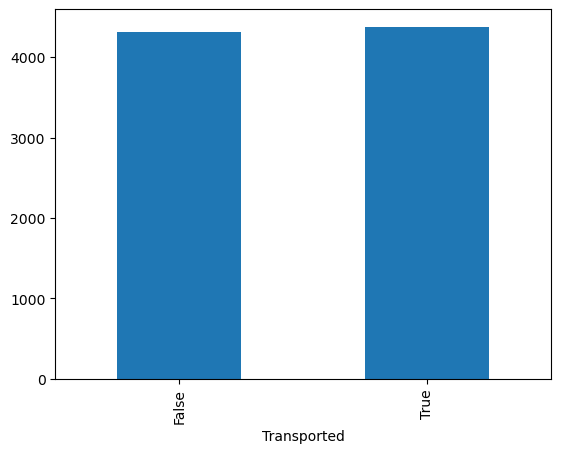

In [22]:
print(train_df.groupby('Transported')['PassengerId'].nunique())
train_df.groupby(['Transported']).size().plot(kind = 'bar')

<AxesSubplot:xlabel='family,Transported'>

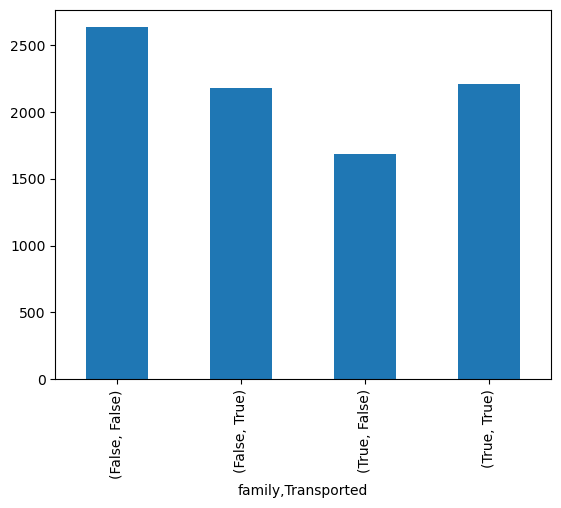

In [25]:
# print(train_df.groupby('family','Transported')['PassengerId'].nunique())
train_df.groupby(['family','Transported']).size().plot(kind = 'bar')